In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cavity_loss_file = "cavity_loss.csv"
gain_0dBm_file = "gain_v_current_0dBm.csv"
gain_minus20dBm_file = "gain_v_current_minus20dBm.csv"
lasing_test_file = "lasing_test.csv"

df_cavity = pd.read_csv(cavity_loss_file)
df_gain0 = pd.read_csv(gain_0dBm_file)
df_gainm20 = pd.read_csv(gain_minus20dBm_file)
df_lasing = pd.read_csv(lasing_test_file)

In [12]:
print(df_cavity)

   Wavelength_nm  Cavity_loss_dB
0           1520           -3.56
1           1530           -3.47
2           1540           -3.21
3           1550           -3.08
4           1560           -3.01
5           1570           -2.97
6           1580           -2.98
7           1590           -2.82
8           1600           -3.24
9           1610           -2.95


In [13]:
print(df_gain0)

   Wavelength_nm  P_50mA_dBm  P_100mA_dBm  P_300mA_dBm
0           1520      -19.51        -0.96         6.56
1           1530      -19.98         2.12         9.95
2           1540       -8.42         3.97        10.86
3           1550       -5.34         4.48        11.03
4           1560       -3.57         4.95        11.46
5           1570       -2.34         5.26        11.02
6           1580       -2.12         4.73         9.79
7           1590       -2.25         4.08         7.73
8           1600       -2.69         2.87         5.14
9           1610       -3.39         0.98         2.50


In [14]:
print(df_gainm20)

   Wavelength_nm  P_50mA_dBm  P_100mA_dBm  P_300mA_dBm
0           1520      -42.55       -14.97        -7.94
1           1530      -40.89        -0.43         8.59
2           1540      -25.94         0.45         8.26
3           1550      -18.28         1.84         9.37
4           1560      -14.05         2.16         9.39
5           1570      -15.17        -2.03         2.10
6           1580      -17.95        -9.74        -8.04
7           1590      -18.84       -12.67       -11.12
8           1600      -20.05       -15.28       -13.87
9           1610      -21.23       -17.51       -16.54


In [15]:
print(df_lasing)

    Current_mA  Natural_1562nm_dBm  Filter1_1520nm_dBm  Filter4_1548nm_dBm
0           10              -70.00              -70.00              -70.00
1           20              -70.00              -70.00              -70.00
2           30              -70.00              -70.00              -70.00
3           40              -70.00              -70.00              -70.00
4           50              -21.89              -70.00              -40.15
5           60              -12.64              -70.00              -14.78
6           70               -8.64              -39.40              -11.07
7           80               -7.88              -17.07               -8.95
8           90               -6.67              -14.13               -7.55
9          100               -5.68              -10.65               -6.44
10         150               -2.56               -5.51               -3.12
11         200               -0.73               -3.09               -1.24
12         250           

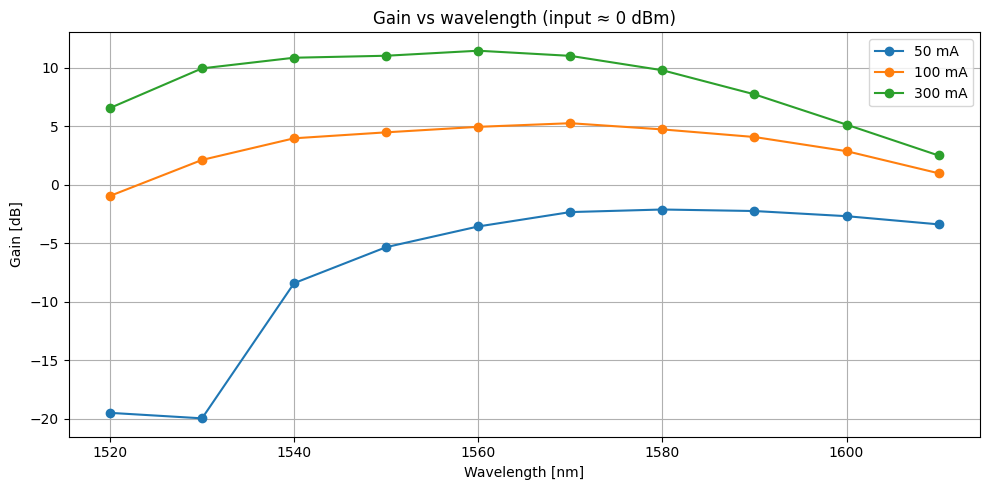

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df_gain0["Wavelength_nm"], df_gain0["P_50mA_dBm"], marker="o", label="50 mA")
plt.plot(df_gain0["Wavelength_nm"], df_gain0["P_100mA_dBm"], marker="o", label="100 mA")
plt.plot(df_gain0["Wavelength_nm"], df_gain0["P_300mA_dBm"], marker="o", label="300 mA")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Gain [dB]")
plt.title("Gain vs wavelength (input ≈ 0 dBm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

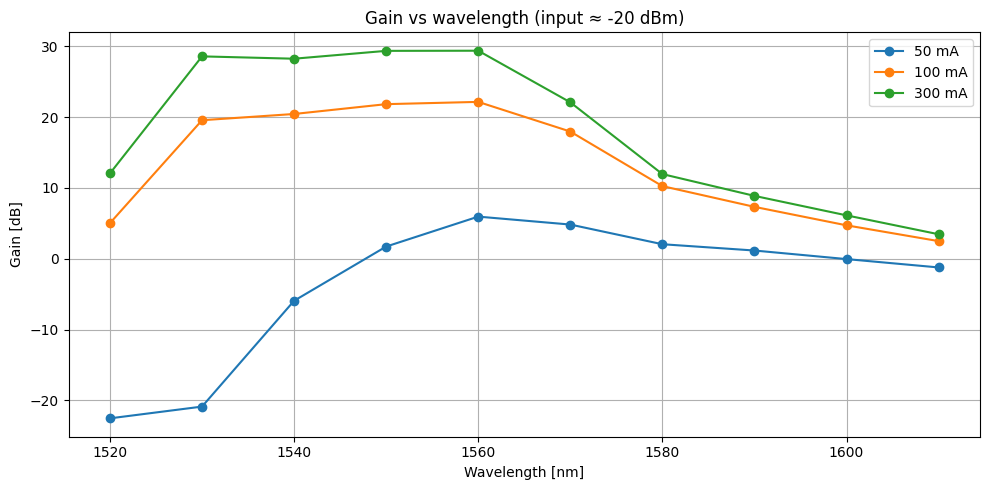

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df_gainm20["Wavelength_nm"], df_gainm20["P_50mA_dBm"]+20, marker="o", label="50 mA")
plt.plot(df_gainm20["Wavelength_nm"], df_gainm20["P_100mA_dBm"]+20, marker="o", label="100 mA")
plt.plot(df_gainm20["Wavelength_nm"], df_gainm20["P_300mA_dBm"]+20, marker="o", label="300 mA")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Gain [dB]")
plt.title("Gain vs wavelength (input ≈ -20 dBm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

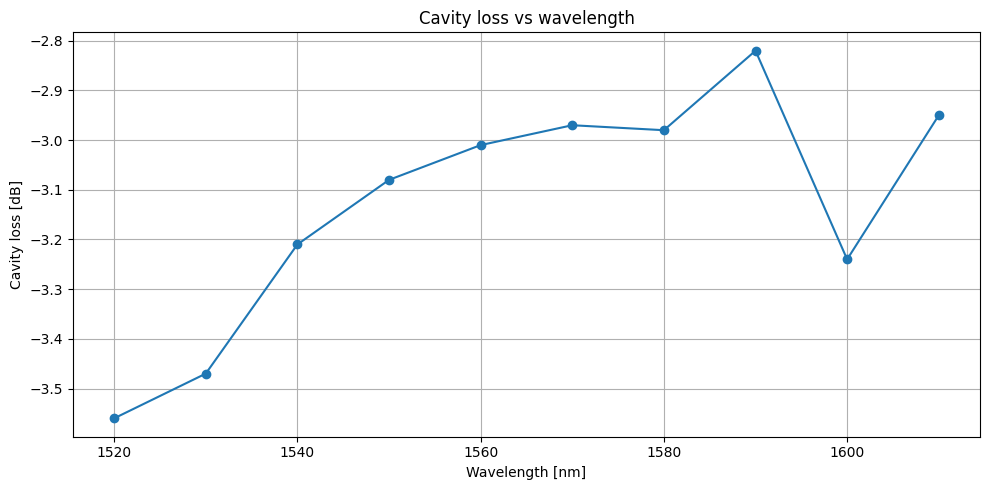

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df_cavity["Wavelength_nm"], df_cavity["Cavity_loss_dB"], marker="o")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Cavity loss [dB]")
plt.title("Cavity loss vs wavelength")
plt.grid(True)
plt.tight_layout()
plt.show()

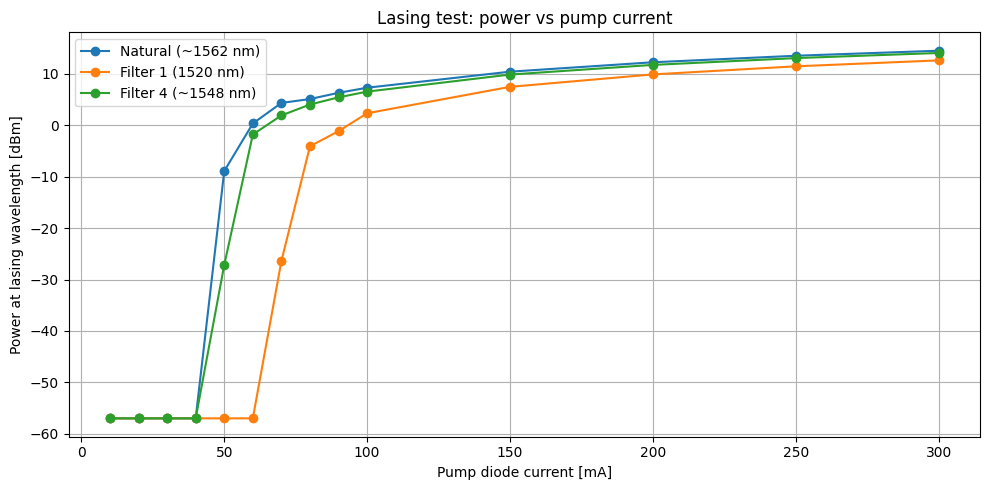

In [ ]:
coupler_losses = 10
cavity_losses = 3
system_losses = coupler_losses + cavity_losses

plt.figure(figsize=(10,5))
plt.plot(df_lasing["Current_mA"], df_lasing["Natural_1562nm_dBm"] + system_losses, marker="o", label="Natural (~1562 nm)")
plt.plot(df_lasing["Current_mA"], df_lasing["Filter1_1520nm_dBm"] + system_losses, marker="o", label="Filter 1 (1520 nm)")
plt.plot(df_lasing["Current_mA"], df_lasing["Filter4_1548nm_dBm"] + system_losses, marker="o", label="Filter 2 (~1548 nm)")
plt.xlabel("Pump diode current [mA]")
plt.ylabel("Power at lasing wavelength [dBm]")
plt.title("Lasing test: power vs pump current")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
